# Detect Face from Images

In [ ]:
%%time
# plot photo with detected faces using opencv cascade classifier
import cv2
from cv2 import imread
from cv2 import imshow
from cv2 import waitKey
from cv2 import destroyAllWindows
from cv2 import CascadeClassifier
from cv2 import rectangle
# load the photograph
pixels = imread('test7.jpg')
# load the pre-trained model
classifier = CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye_tree_eyeglasses.xml')

# perform face detection
bboxes = classifier.detectMultiScale(pixels,  1.1, 3)
# print bounding box for each detected face
for box in bboxes:
    # extract
    x, y, width, height = box
    x2, y2 = x + width, y + height
    # draw a rectangle over the pixels
    rectangle(pixels, (x, y), (x2, y2), (0,0,255), 1)
# show the image
imshow('face detection', pixels)
# keep the window open until we press a key
waitKey(0)
# close the window
destroyAllWindows()

 ***

# Detect Face from camera

In [1]:
%%writefile C:\Users\new\cascade.py
from __future__ import print_function
import cv2 as cv
import argparse
def detectAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
    cv.imshow('Capture - Face detection', frame)
parser = argparse.ArgumentParser(description='Code for Cascade Classifier tutorial.')
parser.add_argument('--face_cascade', help='Path to face cascade.', default='C:\\Users\\new\\Documents\\PythonFiles\\CNN\\Face Detect\\haarcascade_frontalface_alt.xml')
parser.add_argument('--eyes_cascade', help='Path to eyes cascade.', default='C:\\Users\\new\\Documents\\PythonFiles\\CNN\\Face Detect\\haarcascade_eye_tree_eyeglasses.xml')
parser.add_argument('--camera', help='Camera divide number.', type=int, default=0)
args = parser.parse_args()
face_cascade_name = args.face_cascade
eyes_cascade_name = args.eyes_cascade
face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()
#-- 1. Load the cascades
if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
    print('--(!)Error loading face cascade')
    exit(0)
if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
    print('--(!)Error loading eyes cascade')
    exit(0)
camera_device = args.camera
#-- 2. Read the video stream
cap = cv.VideoCapture(camera_device)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)
    if cv.waitKey(10) == 27:
        break

Overwriting C:\Users\new\cascade.py


***

# Face Detection using Multi-Task Cascaded CNN

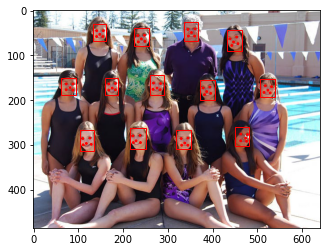

In [2]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot the image
    pyplot.imshow(data)
    # get the context for drawing boxes
    ax = pyplot.gca()
    # plot each box
    for result in result_list:
        # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        # draw the box
        ax.add_patch(rect)
        # draw the dots
        for key, value in result['keypoints'].items():
            # create and draw dot
            dot = Circle(value, radius=2, color='red')
            #cv.rectangle(value,(key,value),(key,value),(0,255,0),2)
            ax.add_patch(dot)
    # show the plot
    pyplot.show()
 
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

## Extracting the faces out of the picture for Face Identification

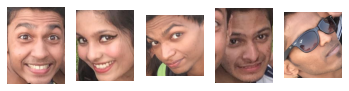

In [5]:
# extract and plot each detected face in a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw each face separately
def draw_faces(filename, result_list):
    # load the image
    data = pyplot.imread(filename)
    # plot each face as a subplot
    for i in range(len(result_list)):
        # get coordinates
        x1, y1, width, height = result_list[i]['box']
        x2, y2 = x1 + width, y1 + height
        # define subplot
        pyplot.subplot(1, len(result_list), i+1)
        pyplot.axis('off')
        # plot face
        pyplot.imshow(data[y1:y2, x1:x2])
    # show the plot
    pyplot.show()
 
filename = 'test6.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)